# Disentanglement analysis

In [2]:
import scanpy as sc
from corals.correlation.full.default import cor_full
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

n_threads = 4

In [3]:
# Import data
adata = sc.read_h5ad("/Users/olyssa/PycharmProjects/VAE_embeddings/PBMC_adata.h5ad")

In [4]:
embedding = adata.obsm["embedding"]
gene_expression = adata.layers["counts"]
n_gene_expression_features = gene_expression.shape[1]
n_embedding_features = embedding.shape[1]

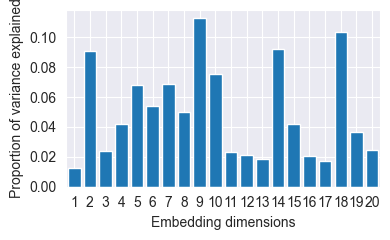

In [5]:
# Compute variance of each latent dimension
variance_per_dim = np.var(embedding, axis=0)

# Normalize to compute proportion of variance explained
explained_variance = variance_per_dim / np.sum(variance_per_dim)

fig, ax = plt.subplots(figsize=(4, 2.5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlim(0.5, 20.5)
plt.xticks(range(1, 21))  
plt.xlabel("Embedding dimensions")
plt.ylabel("Proportion of variance explained")
fig.tight_layout()
fig.savefig('variance_explained.png', dpi=200)
#plt.title("Variance contribution of each Latent dimension")
plt.show()

In [6]:
print("Mean of explained variance:", explained_variance.mean(), "±", explained_variance.std().round(3))

Mean of explained variance: 0.05 ± 0.031


In [7]:
# Initialize lists to store results
correlation_results_em = []

# Compute pairwise correlations between embedding features
for i in range(n_embedding_features):

    feature_values = embedding[:, i].reshape(-1, 1)  # Ensure 2D shape
    correlations = cor_full(feature_values, embedding, method="spearman", n_threads=n_threads)  

    # Extract correlation and p-values
    correlation_results_em.append(correlations.flatten())

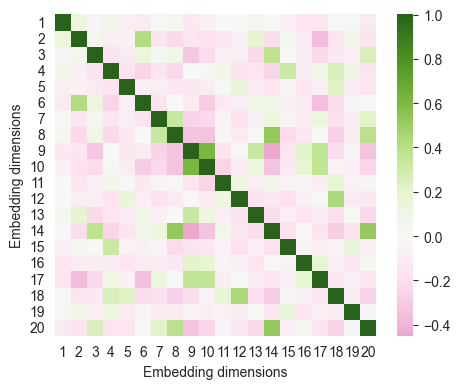

In [8]:
# Convert to DataFrame
feature_names = [f"{i+1}" for i in range(n_embedding_features)]
correlation_df_em = pd.DataFrame(correlation_results_em, index=feature_names, columns=feature_names)

# Save results
correlation_df_em.to_csv("Em_pairwise_spearman_correlation.csv")

# Plot correlation heatmap
fig, axes = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_df_em, cmap="PiYG", annot=False, fmt=".2f", square=True, center=0)
#plt.title("Pairwise Spearman Correlations Between Embedding Dimensions")
plt.xlabel('Embedding dimensions')
plt.ylabel('Embedding dimensions')
plt.xticks(rotation=0)
fig.savefig('disentanglement_matrix.png', dpi=200)
fig.tight_layout()
plt.show()